(start_rate)km/h부터 (end_rate)km/h까지 **(time_interval)km/h 이후의 속도**와 (distance)km당 시간 계산(ex. 1km/h와 2km/h와 1km당 시간 계산, 30km/h와 31km/h와 1km당 시간 계산)

In [45]:
start_rate = 5; end_rate= 20
time_interval = 5;
distance = 10;
rate = [i+time_interval for i in range(start_rate, end_rate +1)]
time_hour_float = [distance/r - distance/(r+time_interval) for r in rate]

In [43]:
def get_hour_minute_second(time_hour_float):
    time_minute_decimal = time_hour_float - int(time_hour_float)
    time_hour = int(time_hour_float)
    
    time_minute_float = time_minute_decimal * 60
    time_second_decimal = time_minute_float - int(time_minute_float)
    time_minute = int(time_minute_float)
    
    time_second_float = time_second_decimal * 60
    
    return [time_hour, time_minute, time_second_float]

In [46]:
hour_minute_second = [get_hour_minute_second(thf) for thf in time_hour_float]
for i in range(len(hour_minute_second)):
    hour_minute_second[i].insert(0, i+start_rate + time_interval); hour_minute_second[i].insert(0, i+start_rate);
print(hour_minute_second)

[[5, 10, 0, 20, 2.1316282072803006e-13], [6, 11, 0, 17, 2.7272727272725916], [7, 12, 0, 14, 42.35294117647065], [8, 13, 0, 12, 49.23076923076927], [9, 14, 0, 11, 16.69172932330838], [10, 15, 0, 9, 59.99999999999989], [11, 16, 0, 8, 55.714285714285836], [12, 17, 0, 8, 1.2834224598931598], [13, 18, 0, 7, 14.782608695652293], [14, 19, 0, 6, 34.73684210526297], [15, 20, 0, 5, 59.99999999999989], [16, 21, 0, 5, 29.67032967032951], [17, 22, 0, 5, 3.030303030303063], [18, 23, 0, 4, 39.50310559006201], [19, 24, 0, 4, 18.620689655172384], [20, 25, 0, 4, 1.5987211554602254e-13]]


결론

어느 정도 속도를 낸다고 했을 때 평속 14 ~ 20 정도로 자전거를 타고, 한 번 달릴 때 보통 20km 전후로 탄다.

운동해서 근력을 기르려고 하는 등 속도를 빠르게 달리고 싶다면 그렇게 해도 되는데  
힘든 상황에서 굳이 빠르게 달리지 않아도 시간적으로 차이가 크게 나지 않는다.

---

조금 더 직관적으로 이해할 수 있는 그래프  
설명은 아직 넣지 않음. 그리 어렵지 않을 거임.

부동소수점의 필연적인 오차로 인해 실제 값이랑 약간의 차이가 있다.

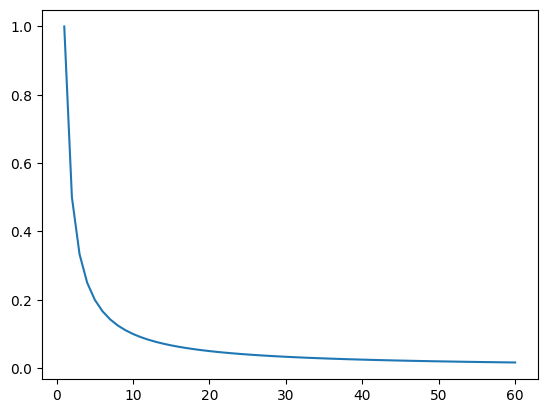

In [1]:
import matplotlib.pyplot as plt
import numpy as np

distance = 1

rate = [i+1 for i in range(60)]
time_hour_float = [distance/r for r in rate]

plt.plot(rate, time_hour_float)
plt.show()

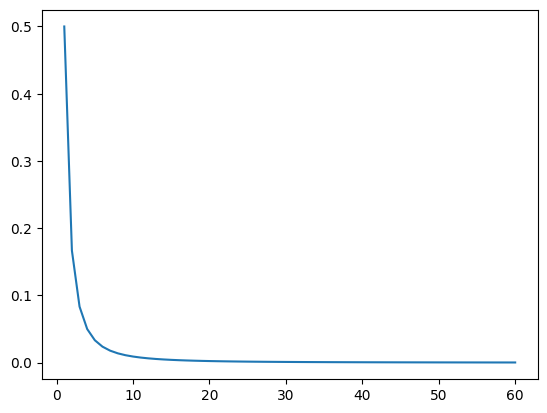

In [61]:
time_hour_gap_float = [distance/r - distance/(r+1) for r in rate]
plt.plot(rate, time_hour_gap_float)
plt.show()

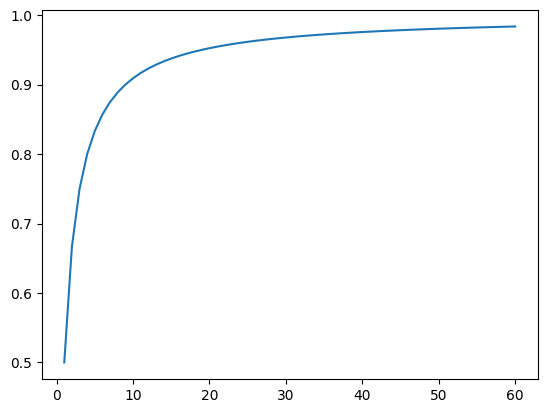

In [62]:
time_hour_gap_accumulate_float = []
time_hour_gap_accumulate_float.append(time_hour_gap_float[0])
for i in range(len(time_hour_gap_float)-1):
    time_hour_gap_accumulate_float.append(time_hour_gap_accumulate_float[i] + time_hour_gap_float[i+1])
plt.plot(rate, time_hour_gap_accumulate_float)
plt.show()

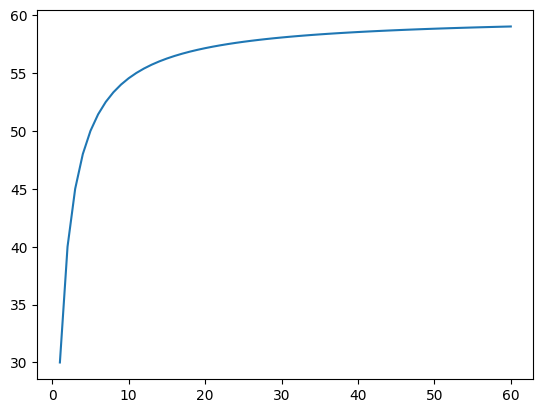

In [64]:
time_hour_gap_accumulate_60_float = [t * 60 for t in time_hour_gap_accumulate_float]
plt.plot(rate, time_hour_gap_accumulate_60_float)
plt.show()

In [80]:
time_60 = time_hour_gap_accumulate_60_float[-1]
print(time_60)
time_50 = time_hour_gap_accumulate_60_float[49]
print(time_50)
time_40 = time_hour_gap_accumulate_60_float[39]
print(time_40)
time_30 = time_hour_gap_accumulate_60_float[29]
print(time_30)
time_20 = time_hour_gap_accumulate_60_float[19]
print(time_20)

59.01639344262291
58.82352941176467
58.53658536585363
58.06451612903224
57.142857142857125


맨 마지막에 보면 20km/h이 1km 가는데 걸리는 시간보다 1분 늦은 속도부터 나열한 배열이 나에게 가장 필요한 정보다.  
왜냐하면 최고 평속이 20이기 때문이다.

In [84]:
time_hour_gap_accumulate_60_float = np.array(time_hour_gap_accumulate_60_float)
print(np.where(time_hour_gap_accumulate_60_float > time_60 - 3))
print(np.where(time_hour_gap_accumulate_60_float > time_50 - 2.7))
print(np.where(time_hour_gap_accumulate_60_float > time_40 - 2.5))
print(np.where(time_hour_gap_accumulate_60_float > time_30 - 2))
print(np.where(time_hour_gap_accumulate_60_float > time_20 - 1))

(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),)
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),)
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),)
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),)
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49